In [23]:
# Import necessary libraries
import os, sys
import numpy as np
import pandas as pd
import itertools
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Inits

In [24]:
# Get the current working directory
base_dir = os.getcwd()
plots_folder = 'plots'

# Load functions from other notebooks
helpers_file = os.path.join(base_dir, 'helpers.ipynb')
%run $helpers_file

current_module = sys.modules[__name__]

class Strategies:
    """
    A class representing different strategies for counterfactual explanation generation.

    Attributes:
    - stypes (list): List of strategy types, including 'random', 'brute_force', 'bfs_yloss', 'bidirectional', and 'combo'.
    """
    stypes = [
        'random',
        'brute_force',
        'bfs_yloss',
        'bidirectional',
        'combo',
    ]

# Movielens 10M

## Load data

In [25]:
## uncomment the following lines if you want to run the various strategies in budget_strategies
implemented_strategies = os.path.join(base_dir, 'clean_budget_strategies_positive.ipynb')
%run $implemented_strategies

# Restore relevant variables from other notebooks

%store -r random_cfs_positive
%store -r brute_force_cfs_positive
%store -r bfs_yloss_cfs_positive
# %store -r dfs_yloss_cfs
# %store -r bestfs_yloss_cfs
%store -r bidirectional_cfs_positive
%store -r combo_cfs_positive

  0%|          | 0/6040 [00:00<?, ?it/s]

The backend used is: Random


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [11:26, 34.33s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [23:39, 50.55s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [35:49, 58.93s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [48:19, 72.48s/it]


Stored 'random_cfs_positive' (list)
The backend used is: BFS


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [01:16,  3.84s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [02:33,  5.44s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [03:15,  4.99s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [04:02,  6.05s/it]


The backend used is: BFS


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [00:57,  2.87s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [01:50,  3.89s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [02:23,  3.66s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [02:54,  4.37s/it]


Stored 'bfs_yloss_cfs_positive' (list)
The backend used is: BiDirectional


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [21:45, 65.26s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [43:31, 92.50s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:05:25, 107.00s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:27:50, 131.75s/it]


The backend used is: BiDirectional


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [21:41, 65.08s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [43:14, 91.82s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:04:55, 106.12s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:26:52, 130.31s/it]


The backend used is: BiDirectional


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [16:25, 49.29s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [33:09, 70.55s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [49:45, 81.39s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:06:21, 99.54s/it]


Stored 'bidirectional_cfs_positive' (list)
The backend used is: BruteForce


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [21:32, 64.60s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [29:44, 58.19s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [33:27, 44.79s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [33:51, 50.78s/it]


Stored 'brute_force_cfs_positive' (list)
The backend used is: Combo


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [21:34, 64.74s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [42:56, 91.15s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:04:01, 104.35s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:25:12, 127.82s/it]


The backend used is: Combo


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [21:52, 65.62s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [42:56, 90.95s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:04:06, 104.40s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:26:08, 129.21s/it]


The backend used is: Combo


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [15:58, 47.93s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [33:16, 71.22s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [51:22, 85.14s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [1:08:48, 103.20s/it]


Stored 'combo_cfs_positive' (list)


## Save/retrieve data experiment if necessary

In [40]:
import pickle

base_dir = os.getcwd()
pkl_dir = os.path.join(base_dir, 'pkl/')


In [41]:
# Uncomment these lines to save the object from the budget strategies notebook in the pkl folder
with open(os.path.join(pkl_dir,'random_cfs_positive.pkl'), 'wb') as f:
    pickle.dump(random_cfs_positive, f)
    
with open(os.path.join(pkl_dir,'brute_force_cfs_positive.pkl'), 'wb') as f:
    pickle.dump(brute_force_cfs_positive, f)

with open(os.path.join(pkl_dir,'bfs_yloss_cfs_positive.pkl'), 'wb') as f:
    pickle.dump(bfs_yloss_cfs_positive, f)

with open(os.path.join(pkl_dir,'bidirectional_cfs_positive.pkl'), 'wb') as f:
    pickle.dump(bidirectional_cfs_positive, f)

with open(os.path.join(pkl_dir,'combo_cfs_positive.pkl'), 'wb') as f:
    pickle.dump(combo_cfs_positive, f)

In [ ]:
# Uncomment these lines to load the object stored as pkl in the pkl folder
# with open(os.path.join(pkl_dir,'random_cfs_positive.pkl'), 'rb') as f:
    # random_cfs_positive = pickle.load(f)
    # 
# with open(os.path.join(pkl_dir,'brute_force_cfs_positive.pkl'), 'rb') as f:
    # brute_force_cfs_positive = pickle.load(f)
    # 
# with open(os.path.join(pkl_dir,'bfs_yloss_cfs_positive.pkl'), 'rb') as f:
    # bfs_yloss_cfs_positive = pickle.load(f)
    # 
# with open(os.path.join(pkl_dir,'bidirectional_cfs_positive.pkl'), 'rb') as f:
    # bidirectional_cfs_positive = pickle.load(f)
    # 
# with open(os.path.join(pkl_dir,'combo_cfs_positive.pkl'), 'rb') as f:
    # combo_cfs_positive = pickle.load(f)

## Prepare data

In [26]:
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)
strs_prefix = ''

for i in range(1):
    # Convert results to lists for each strategy
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[0]}_cfs_positive')[i],
        cnt, no_target_achieved_cases, f'random_{i}', False)
    
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[1]}_cfs_positive')[i],
        cnt, no_target_achieved_cases, f'brute_force_{i}', False)

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[2]}_cfs_positive')[i + 1],
        cnt, no_target_achieved_cases, f'bfs_{i}', False)

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs_positive')[i],
        cnt, no_target_achieved_cases, f'bidirectional_001_{i}', False)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs_positive')[i + 1],
        cnt, no_target_achieved_cases, f'bidirectional_5_{i}', False)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs_positive')[i + 2],
        cnt, no_target_achieved_cases, f'bidirectional_999_{i}', False)

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs_positive')[i],
        cnt, no_target_achieved_cases, f'combo_001_{i}', False)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs_positive')[i + 1],
        cnt, no_target_achieved_cases, f'combo_5_{i}', False)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs_positive')[i + 2],
        cnt, no_target_achieved_cases, f'combo_999_{i}', False)

In [27]:
methods_supported = ['Brute_Force', 'Random', 'BFS'] + \
    [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
    [f'Combo_{m}' for m in ['001', '5', '999']]

strategies = [('init', 2), ('best', 3)]
custom_range = [9, 29] # Range to access to the "stats per cardinality" part (please check the convert_res_to_lists method in the helpers notebook for more info)
target_pos = list(cnt.keys())
cnames = ['user_id', 'method', 'pos', 'budget', 'init_budget', 'best_budget', 'cardinality', 'cfs_orig', 'cfs']

rows, cols = 5, 1

tmp_dfs = []
for col in range(cols):
    for pos, row in zip(target_pos, range(rows)):

        tmp_dfs.append(pd.DataFrame.from_records(list(
            itertools.chain(*(
                zip(v[6], itertools.repeat(k), itertools.repeat(pos), v[i], v[2], v[3],
                    itertools.repeat(i - custom_range[0] + 1), v[7], v[8])
                for k, v in cnt[pos].items() if f'_{col}' in k and k.rsplit('_', 1)[0] in map(lambda x: x.lower(), methods_supported)
                for i in range(custom_range[0], custom_range[1])
            ))), columns=cnames
        ))

df = pd.concat(tmp_dfs, ignore_index=True)
print(df.head(20))

    user_id    method  pos  budget  init_budget  best_budget  cardinality  \
0         5  random_0    1       0            1            4            1   
1         8  random_0    1       0           62          431            1   
2         9  random_0    1       0            2          565            1   
3        10  random_0    1       0            1          248            1   
4        11  random_0    1       0            1          430            1   
5        15  random_0    1       0            1          503            1   
6        17  random_0    1       0            1          954            1   
7        18  random_0    1       0            3          349            1   
8        19  random_0    1       0            1          138            1   
9        22  random_0    1       0            1          456            1   
10       23  random_0    1       0           31          352            1   
11       24  random_0    1       0            1          211            1   

In [28]:
print(df)

        user_id       method  pos  budget  init_budget  best_budget  \
0             5     random_0    1       0            1            4   
1             8     random_0    1       0           62          431   
2             9     random_0    1       0            2          565   
3            10     random_0    1       0            1          248   
4            11     random_0    1       0            1          430   
...         ...          ...  ...     ...          ...          ...   
164155      493  combo_999_0    7       0            1            1   
164156      494  combo_999_0    7       0           18           18   
164157      496  combo_999_0    7       0           17           17   
164158      498  combo_999_0    7       0           20           20   
164159      499  combo_999_0    7       0           18           18   

        cardinality  cfs_orig  cfs  
0                 1        20    8  
1                 1        20    7  
2                 1        20    4  

In [29]:
idx = df.loc[(df['cfs_orig'] == df['cfs'])].duplicated(subset=['user_id', 'method', 'pos'], keep='last')
df.loc[(df['cfs_orig'] == df['cfs']) & ~idx, ['budget']] = df.loc[(df['cfs_orig'] == df['cfs']) & ~idx]['best_budget']

In [30]:
def grouping(x, i=1):
    users_uniq = x['user_id'].nunique()
    print(x.columns)
    mask = x.apply(lambda d : d['cardinality'] <= i)
    no_users = x.loc[mask].sum()
#     journal_author = x.groupby('Journal').apply(lambda d : ((((d['Subscription'] == 1) & (d['Known_author'] == 1)).sum()) > 0)).sum()
    return pd.Series([no_users])
# ddf = df.groupby(['method', 'pos']).apply(grouping)


# # 1st plot: %users per card
all_users = df['user_id'].nunique()

res = []
for i in range(1, 21):
    res.append(df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
               .groupby(['method', 'pos'], sort=False)[['user_id', 'cfs']]
               .nunique()
               .reset_index())

ddf = pd.concat(res, ignore_index=True)
ddf['%users'] = (ddf['user_id'] / all_users) * 100

# 2nd plot: average budget
max_card = 5
init = 100
end = 1001
step = 100


res = []
for b in range(init, end, step):
    aggregated = df[(df['budget'] > 0) & (df['best_budget'] <= b)]\
        .groupby(['method', 'pos'], sort=False)\
        .agg(card_mean=('cfs', 'mean'), no_users=('user_id', 'nunique'))\
        .reset_index()
    aggregated['budget_thres'] = b
    aggregated['max_users'] = aggregated.groupby(['pos'])['no_users'].transform(max)
    res.append(aggregated)

ddf2 = pd.concat(res, ignore_index=True)
ddf2['%users'] = (ddf2['no_users'] / all_users) * 100
# ddf2['combined_means'] = ((ddf2['card_mean'] * ddf2['no_users']) + (20 * (ddf2['max_users'] - ddf2['no_users']))) / (ddf2['max_users'])
ddf2['combined_means'] = ddf2['card_mean']


# 3rd plot:
def aggf(data):
    users_grouping = data.groupby(['user_id']).apply(
        lambda d: d.loc[d['budget'] == d['budget'].max()]
    )

    return pd.Series(
        [users_grouping['budget'].mean(),
         users_grouping['user_id'].count()],
        ['avg_budget', 'no_users']
    )

# .apply(lambda d: pd.Series(dict(
#             avg_budget=d.groupby(['user_id']).apply(
#                 lambda x: x.loc[(x['cardinality'] == x['cardinality'].min()), 'budget'].mean(),
#             ),
# #             no_users=d.loc[d['cardinality'],min(), 'user_id'].count(),
#             max_users=d['user_id'].nunique()
#         )))\


res = []
for i in range(5, 0, -1):
    aggregated = df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]\
        .groupby(['method', 'pos'], sort=False)\
        .apply(aggf)\
        .reset_index()
    aggregated['cardinality'] = i
    res.append(aggregated)

ddf3 = pd.concat(res, ignore_index=True)
ddf3['%users'] = (ddf3['no_users'] / all_users) * 100

## Plots

In [31]:
import matplotlib.ticker as mticker


sns.set_theme(style="ticks", font_scale=1.5, )

# Create an array with the colors you want to use
# colors = ["#FF0B04", "#4374B3", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ['black', 'darkred', 'green', 'darkblue', 'dodgerblue', 'darkturquoise', 'darkgoldenrod', 'orange', 'chocolate']

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

# custom_markers = ['o', 'v', '^', 's', 'P', 'X', '<', '>', 'D', ]
custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

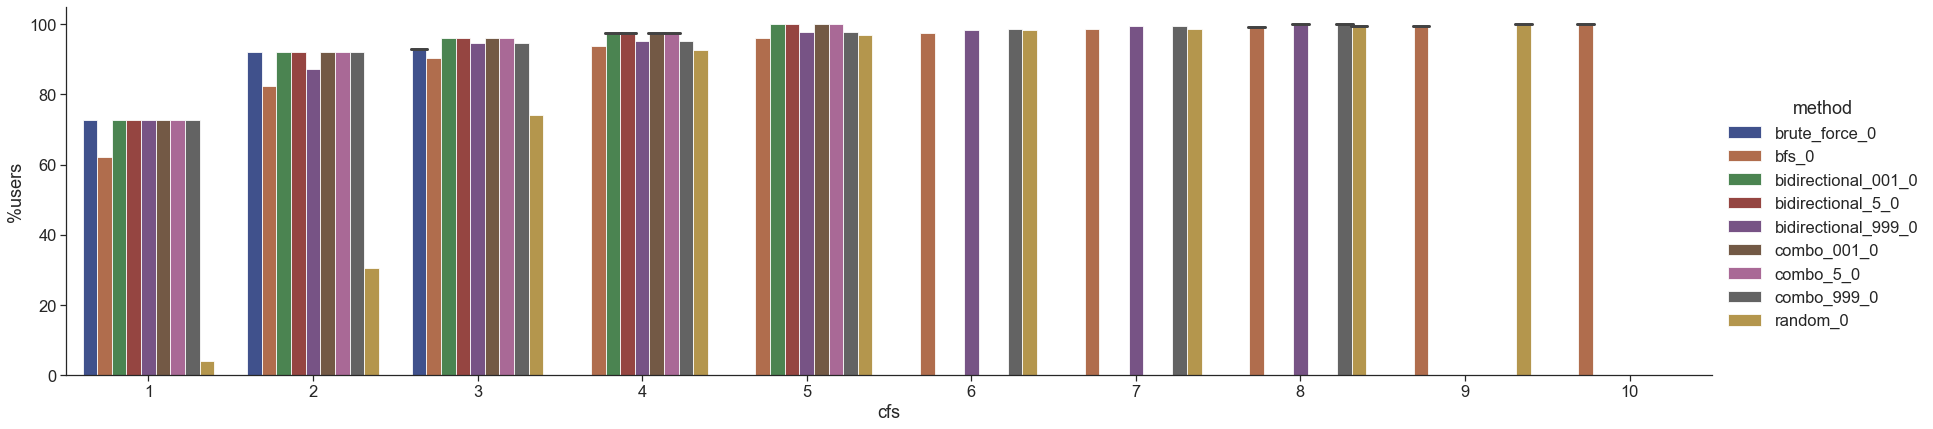

In [32]:
a4_dims = (11.7, 8.27)

g = sns.catplot(
    data=ddf[(ddf['pos']==3) ], kind="bar",
    x="cfs", y="%users", hue="method",
    ci="sd", capsize=0.1, palette="dark", alpha=.8, height=6, aspect=4,
)

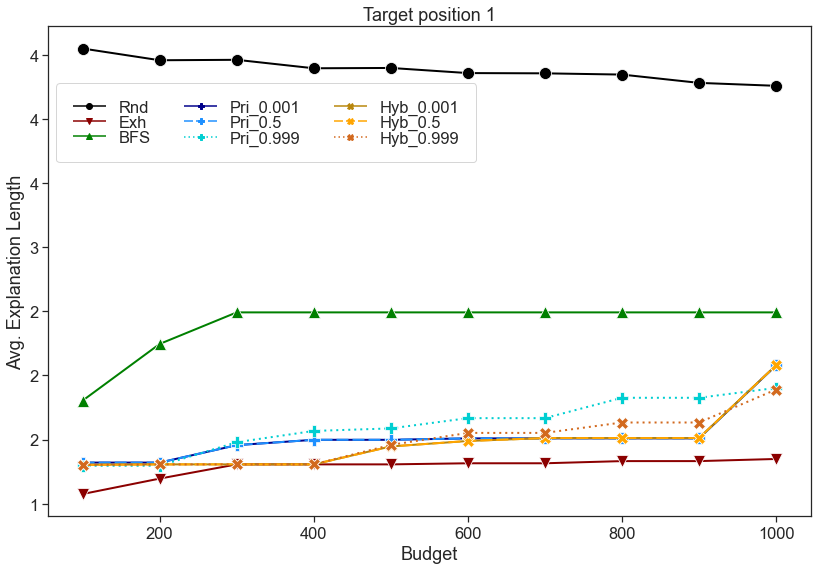

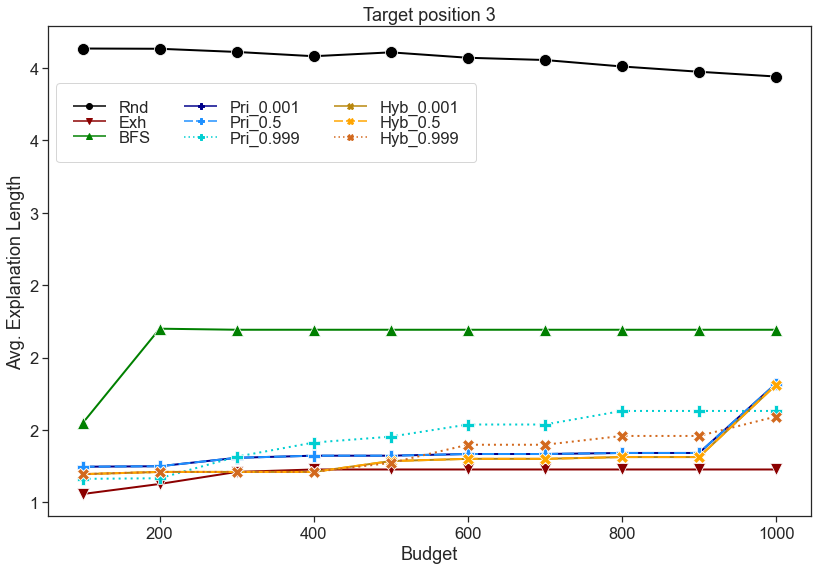

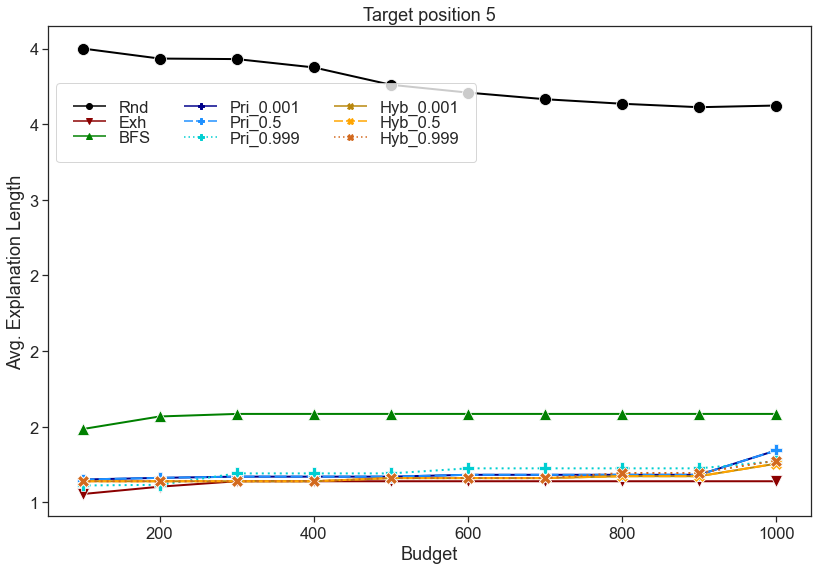

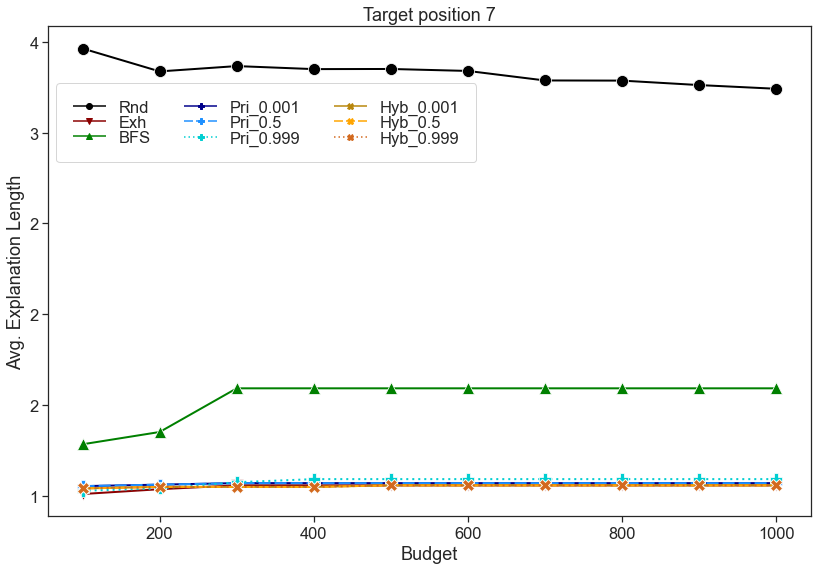

In [33]:
# Loop through each position and create individual line plots
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="card_mean", hue="method", style='method',
        palette=custom_palette,
        markers=custom_markers, markersize=12, lw=2, ls='solid', dashes=custom_dashes[:len(ddf2['method'].unique())]
    )

    # Set the y-axis to logarithmic scale
    # g.set(yscale='log')

    # Set formatting for y-axis labels
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set labels for x-axis and y-axis, and title for the plot
    ax.set(xlabel="Budget", ylabel="Avg. Explanation Length")
    ax.set_title(f'Target position {p}')

    # Adjust layout and save the plot as a PDF file
    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"avg_card_to_thres_pos_{p}.pdf"), dpi=300)

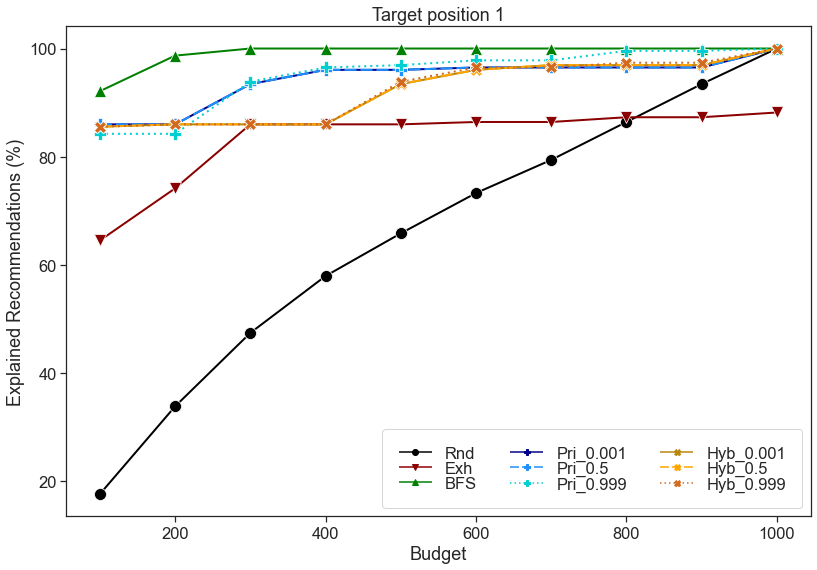

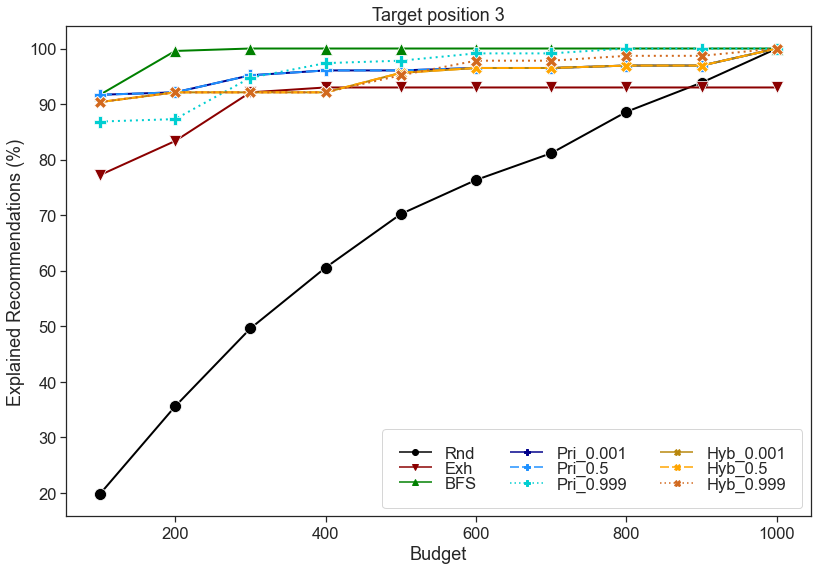

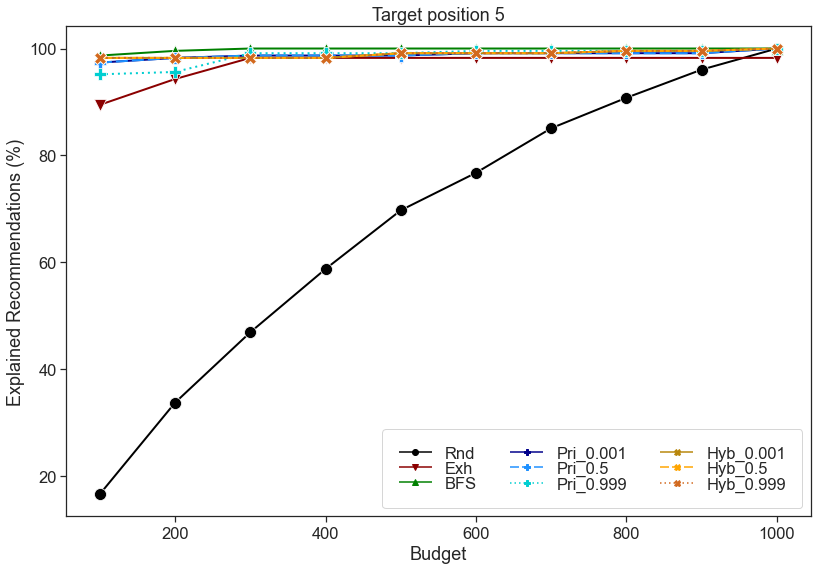

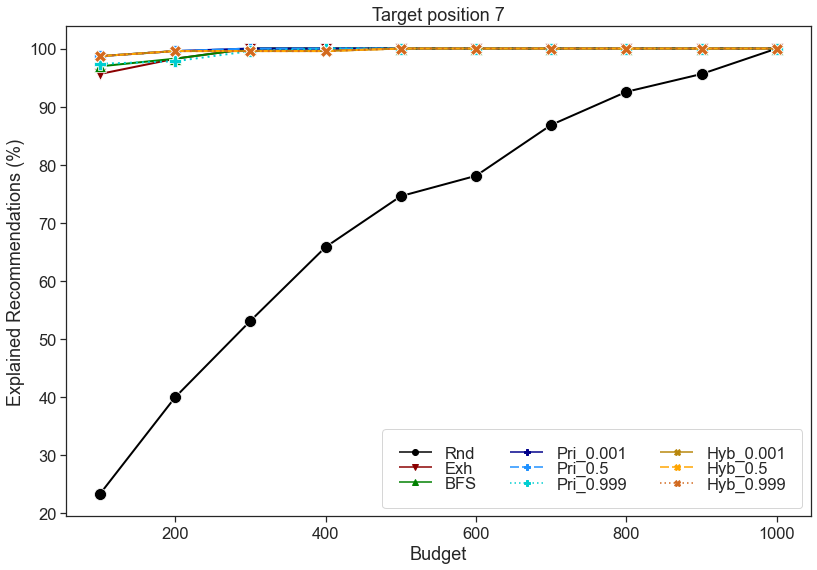

In [34]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"users_percent_to_thres_pos_{p}.pdf"), dpi=300)

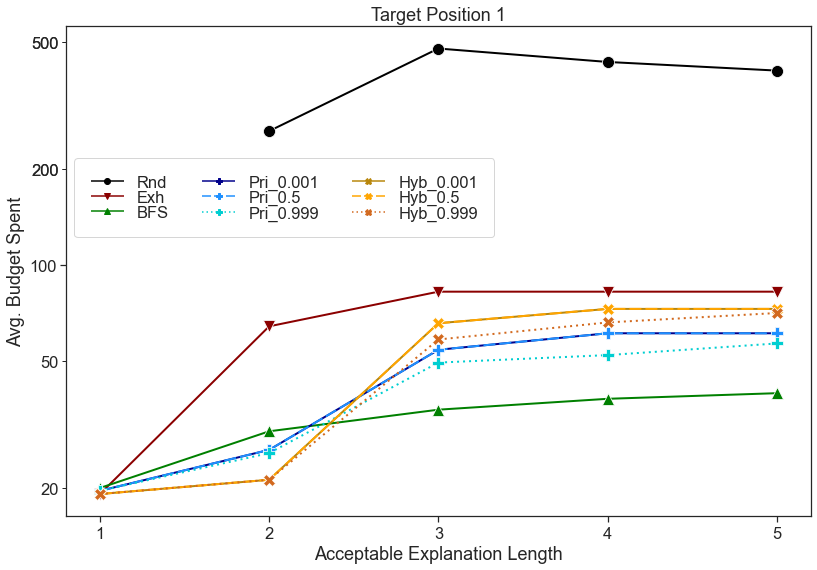

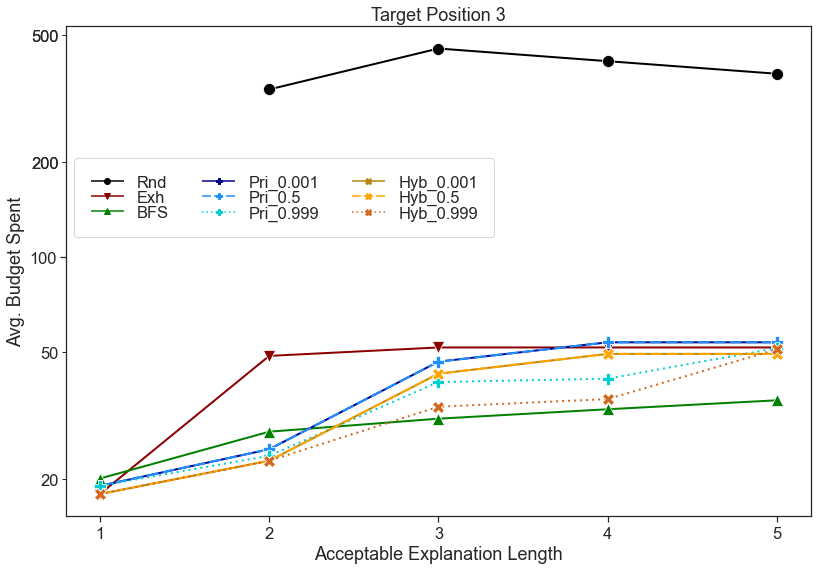

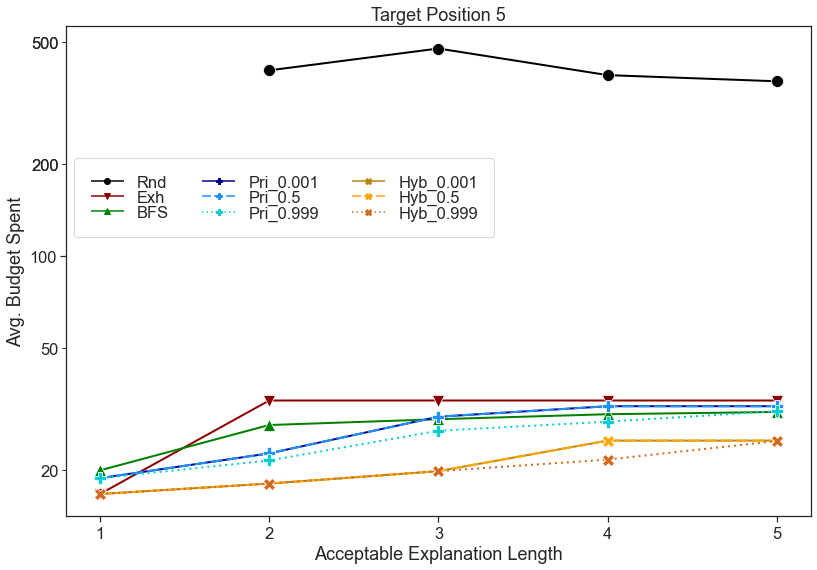

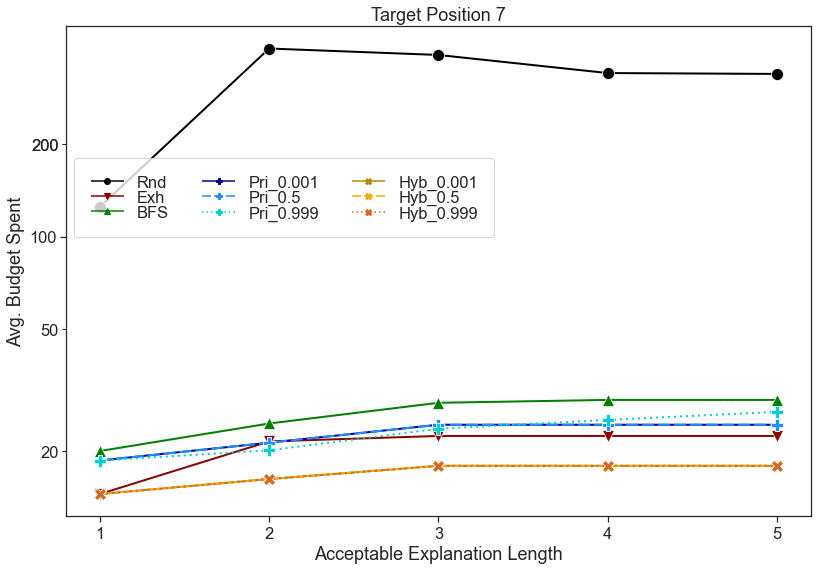

In [35]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf3[(ddf3['pos']==p)],
        x="cardinality", y="avg_budget", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )
    g.set(yscale='log')
    locmin = mticker.LogLocator(base=10, subs=[10, 20, 50, 100, 200, 500, 700], numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
    # ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

    # plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='center left', bbox_to_anchor=(0, 0.65), ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Avg. Budget Spent")
    ax.set_title(f'Target Position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"avg_budget_to_card_pos_{p}.pdf"), dpi=300)

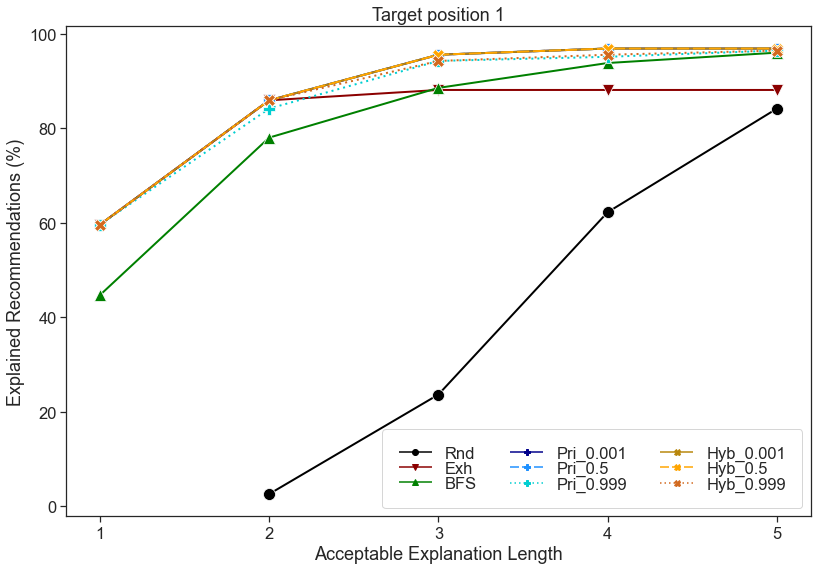

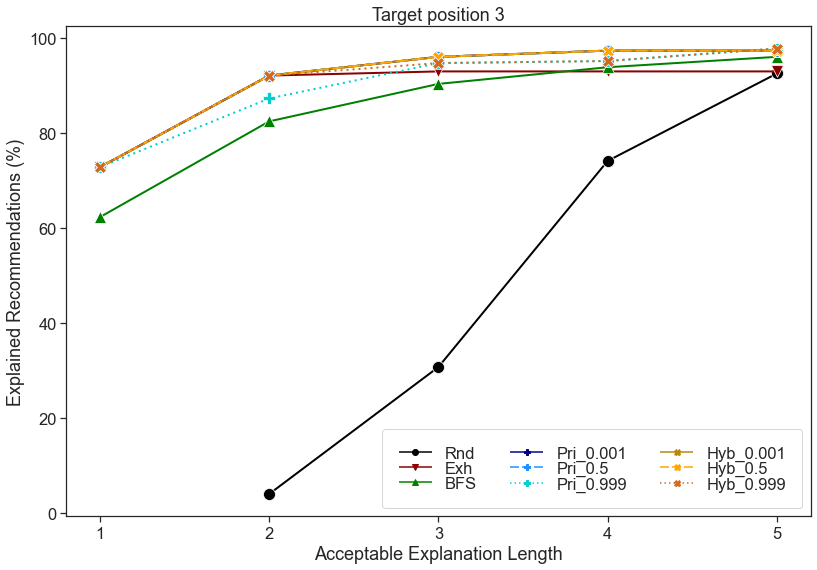

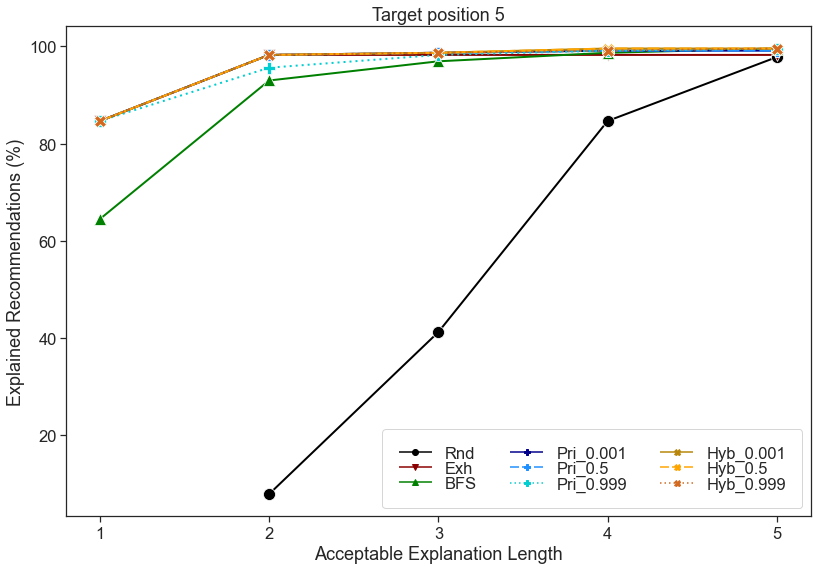

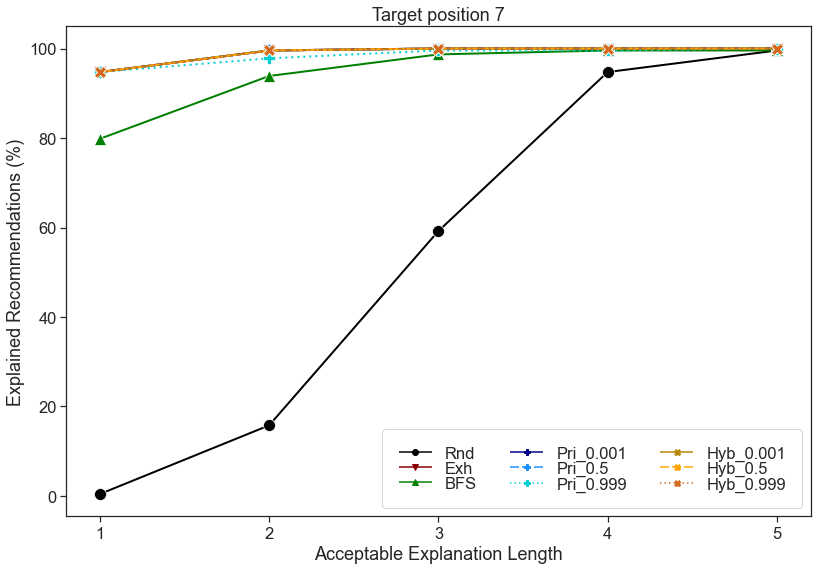

In [36]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(ax=ax,
        data=ddf3[(ddf3['pos']==p) ],
        x="cardinality", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"users_percent_to_card_pos_{p}.pdf"), dpi=300)

# Amazon

## Load data

In [37]:
## uncomment the following lines if you want to run the various strategies in budget_strategies
# implemented_strategies = os.path.join(base_dir, 'budget_strategies.ipynb')
# %run $implemented_strategies

%store -r amazon_random_cfs
%store -r amazon_brute_force_cfs

%store -r amazon_bfs_yloss_cfs
# %store -r dfs_yloss_cfs
# %store -r bestfs_yloss_cfs

%store -r amazon_bidirectional_cfs
%store -r amazon_combo_cfs

no stored variable or alias amazon_random_cfs
no stored variable or alias amazon_brute_force_cfs
no stored variable or alias amazon_bfs_yloss_cfs
no stored variable or alias amazon_bidirectional_cfs
no stored variable or alias amazon_combo_cfs


## Prepare data

In [38]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)
strs_prefix = 'amazon_'

for i in range(1):
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[0]}_cfs')[i],
        cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[1]}_cfs')[i],
        cnt, no_target_achieved_cases, f'brute_force_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[2]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bfs_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bidirectional_001_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'bidirectional_5_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'bidirectional_999_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i],
        cnt, no_target_achieved_cases, f'combo_001_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'combo_5_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'combo_999_{i}')

AttributeError: module '__main__' has no attribute 'amazon_random_cfs'

In [ ]:
methods_supported = ['Brute_Force', 'Random', 'BFS'] + \
    [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
    [f'Combo_{m}' for m in ['001', '5', '999']]

strategies = [('init', 2), ('best', 3)]
custom_range = [9, 29]
target_pos = list(cnt.keys())
cnames = ['user_id', 'method', 'pos', 'budget', 'init_budget', 'best_budget', 'cardinality', 'cfs_orig', 'cfs']

rows, cols = 5, 1

tmp_dfs = []
for col in range(cols):
    for pos, row in zip(target_pos, range(rows)):

        tmp_dfs.append(pd.DataFrame.from_records(list(
            itertools.chain(*(
                zip(v[6], itertools.repeat(k), itertools.repeat(pos), v[i], v[2], v[3],
                    itertools.repeat(i - custom_range[0] + 1), v[7], v[8])
                for k, v in cnt[pos].items() if f'_{col}' in k and k.rsplit('_', 1)[0] in map(lambda x: x.lower(), methods_supported)
                for i in range(custom_range[0], custom_range[1])
            ))), columns=cnames
        ))

df = pd.concat(tmp_dfs, ignore_index=True)

In [ ]:
idx = df.loc[(df['cfs_orig'] == df['cfs'])].duplicated(subset=['user_id', 'method', 'pos'], keep='last')
df.loc[(df['cfs_orig'] == df['cfs']) & ~idx, ['budget']] = df.loc[(df['cfs_orig'] == df['cfs']) & ~idx]['best_budget']

In [ ]:
def grouping(x, i=1):
    users_uniq = x['user_id'].nunique()
    print(x.columns)
    mask = x.apply(lambda d : d['cardinality'] <= i)
    no_users = x.loc[mask].sum()
#     journal_author = x.groupby('Journal').apply(lambda d : ((((d['Subscription'] == 1) & (d['Known_author'] == 1)).sum()) > 0)).sum()
    return pd.Series([no_users])
# ddf = df.groupby(['method', 'pos']).apply(grouping)


# # 1st plot: %users per card
all_users = df['user_id'].nunique()

res = []
for i in range(1, 21):
    res.append(df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
               .groupby(['method', 'pos'], sort=False)[['user_id', 'cfs']]
               .nunique()
               .reset_index())

ddf = pd.concat(res, ignore_index=True)
ddf['%users'] = (ddf['user_id'] / all_users) * 100

# 2nd plot: average budget
max_card = 5
init = 100
end = 1001
step = 100


res = []
for b in range(init, end, step):
    aggregated = df[(df['budget'] > 0) & (df['best_budget'] <= b)]\
        .groupby(['method', 'pos'], sort=False)\
        .agg(card_mean=('cfs', 'mean'), no_users=('user_id', 'nunique'))\
        .reset_index()
    aggregated['budget_thres'] = b
    aggregated['max_users'] = aggregated.groupby(['pos'])['no_users'].transform(max)
    res.append(aggregated)

ddf2 = pd.concat(res, ignore_index=True)
ddf2['%users'] = (ddf2['no_users'] / all_users) * 100
# ddf2['combined_means'] = ((ddf2['card_mean'] * ddf2['no_users']) + (20 * (ddf2['max_users'] - ddf2['no_users']))) / (ddf2['max_users'])
ddf2['combined_means'] = ddf2['card_mean']


# 3rd plot:
def aggf(data):
    users_grouping = data.groupby(['user_id']).apply(
        lambda d: d.loc[d['budget'] == d['budget'].max()]
    )

    return pd.Series(
        [users_grouping['budget'].mean(),
         users_grouping['user_id'].count()],
        ['avg_budget', 'no_users']
    )

# .apply(lambda d: pd.Series(dict(
#             avg_budget=d.groupby(['user_id']).apply(
#                 lambda x: x.loc[(x['cardinality'] == x['cardinality'].min()), 'budget'].mean(),
#             ),
# #             no_users=d.loc[d['cardinality'],min(), 'user_id'].count(),
#             max_users=d['user_id'].nunique()
#         )))\


res = []
for i in range(5, 0, -1):
    aggregated = df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]\
        .groupby(['method', 'pos'], sort=False)\
        .apply(aggf)\
        .reset_index()
    aggregated['cardinality'] = i
    res.append(aggregated)

ddf3 = pd.concat(res, ignore_index=True)
ddf3['%users'] = (ddf3['no_users'] / all_users) * 100

## Plots

In [ ]:
import matplotlib.ticker as mticker


sns.set_theme(style="ticks", font_scale=1.5, )

# Create an array with the colors you want to use
# colors = ["#FF0B04", "#4374B3", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ['black', 'darkred', 'green', 'darkblue', 'dodgerblue', 'darkturquoise', 'darkgoldenrod', 'orange', 'chocolate']

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

# custom_markers = ['o', 'v', '^', 's', 'P', 'X', '<', '>', 'D', ]
custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

In [ ]:
# Draw a nested barplot by species and sex
# g = sns.catplot(
#     data=ddf2[ddf2['pos']==3], kind="bar",
#     x="budget_thres", y='combined_means', hue="method",
#     ci=None, palette="dark", alpha=.8, height=6, aspect=4,
# )

# num_locations = len(ddf2.groupby('budget_thres').groups.keys())
# hatches = itertools.cycle(['//', '+', '-', 'x', '\\', '*', 'o', '.'])
# for i, bar in enumerate(g.ax.patches):
#     if i % num_locations == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)

# g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=False)

# g.despine(left=True)
# g.set_axis_labels("threshold", "cardinality average")
# g.legend.set_title("")

rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="card_mean", hue="method", style='method',
        palette=custom_palette,
        markers=custom_markers, markersize=12, lw=2, ls='solid', dashes=custom_dashes
    )

    g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#     ax.yaxis.get_major_formatter().set_scientific(False)
#     ax.yaxis.get_major_formatter().set_useOffset(False)

    # Turns on grid on the Axis.
#     plt.grid(True, which="both", ls="--", c='gray')
#     scientific_formatter = mticker.FuncFormatter()
#     ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Avg. Explanation Length")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}avg_card_to_thres_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}users_percent_to_thres_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf3[(ddf3['pos']==p)],
        x="cardinality", y="avg_budget", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )
    g.set(yscale='log')
    locmin = mticker.LogLocator(base=10, subs=[10, 20, 50, 100, 200, 500, 700], numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='center left', bbox_to_anchor=(0, 0.65), ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Avg. Budget Spent")
    ax.set_title(f'Target Position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}avg_budget_to_card_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(ax=ax,
        data=ddf3[(ddf3['pos']==p) ],
        x="cardinality", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}users_percent_to_card_pos_{p}.pdf"), dpi=300)